In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from rdflib import Graph
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from networkx.algorithms import bipartite
from datetime import datetime

------------------------------------------------
SENATORI

In [2]:
sen = pd.read_csv("data/composizione_commissioni_data.csv")

In [3]:
le = LabelEncoder().fit(sen['titolo'])
sen['titolo'] = le.transform(sen['titolo'])

In [4]:
id = []
for i in range(sen.shape[0]):
    id.append(sen['senatore'][i][31:])

In [5]:
sen['id'] = id
sen.drop('senatore', axis = 1, inplace= True)
sen

,nome,cognome,inizioAfferenza,carica,commissione,titolo,id
0,Alberto,Balboni,2022-11-10,Presidente,http://dati.senato.it/commissione/0-1,1,17542
1,Marcello,Pera,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,3900
2,Daisy,Pirovano,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,18562
3,Marco,Meloni,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,29490
4,Peppe,De Cristofaro,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,22918
...,...,...,...,...,...,...,...
358,Andrea,Crisanti,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,36387
359,Marco,Dreosto,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,36396
360,Ester,Mieli,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,36408
361,Marco,Scurria,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,33863


In [6]:
np.unique(sen['id'])

array(['1103', '1116', '1227', '1275', '1407', '1558', '1672', '17542',
       '17811', '17924', '18055', '18121', '18562', '22263', '227',
       '22707', '22814', '22871', '22877', '22910', '22914', '22918',
       '22963', '22966', '23011', '24016', '2444', '25377', '25402',
       '25407', '25411', '25429', '25446', '25474', '25555', '25558',
       '27622', '28306', '28543', '28550', '28670', '28924', '29067',
       '29105', '29132', '29138', '29185', '29270', '29273', '29291',
       '29292', '29293', '29406', '29425', '29447', '29467', '29480',
       '29490', '29521', '29573', '29604', '30110', '30294', '30510',
       '30511', '30512', '30742', '30915', '31010', '31725', '31875',
       '32', '32435', '32578', '32583', '32586', '32590', '32598',
       '32600', '32601', '32603', '32608', '32619', '32624', '32628',
       '32634', '32644', '32645', '32650', '32653', '32655', '32658',
       '32660', '32673', '32677', '32681', '32691', '32697', '32699',
       '32703', '32706',

In [7]:
G = nx.Graph()
G.add_nodes_from(np.unique(sen['id']), bipartite  = 0)
G.add_nodes_from(sen['titolo'], bipartite = 1)

In [8]:
a = []
for i in range(sen.shape[0]):
    a.append((sen['id'][i], sen['titolo'][i]))

In [9]:
G.add_edges_from(a)

In [10]:
G = nx.projected_graph(G, nodes = sen['id'])
G.number_of_nodes()

206

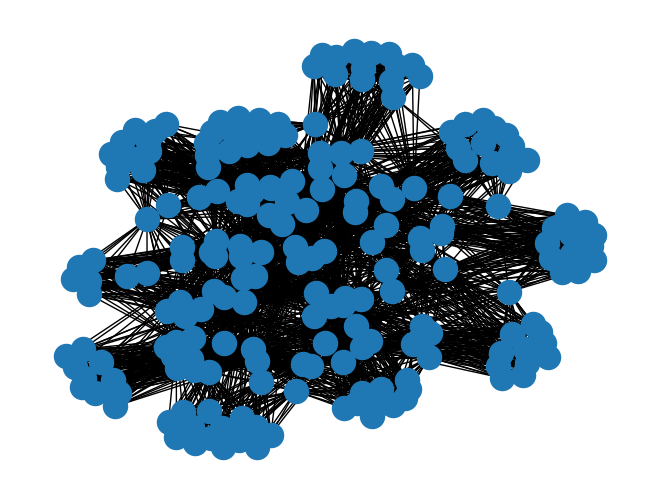

In [11]:
nx.draw(G)

------------------------------------------------------------
DEPUTATI

In [12]:
dep = pd.read_csv('data/dep_18.csv')[['persona', 'nomeGruppo', 'nome', 'cognome']]
a = dep['cognome']+ ' ' + dep['nome']
dep['Parlamentare'] = a
dep.drop(['nome', 'cognome'], axis = 1, inplace= True)

a = []
for i in range(dep.shape[0]):
    a.append(dep['persona'][i][39:])

dep['id'] = a
dep.drop('persona', inplace= True, axis = 1)

p = []
dat = []
for i in dep['nomeGruppo']:
    e = i.split()
    p.append(e[-2])
    d = e[-1].replace(')', '')
    dat.append(datetime.strptime(d[-10:], '%d.%m.%Y'))

dep['Partito'] = p
dep['dataIngresso'] = dat
dep.drop('nomeGruppo', axis = 1, inplace= True)


FileNotFoundError: [Errno 2] No such file or directory: 'data/dep_18.csv'

In [ ]:
dep

,Parlamentare,id,Partito,dataIngresso
0,GIORGETTI GIANCARLO,50115,(LEGA),2018-03-27
1,GAVA VANNIA,307138,(LEGA),2018-03-27
2,MUGNAI STEFANO,307260,(FI),2018-03-27
3,CASTELLI LAURA,305525,(IPF-IC),2022-06-21
4,CARNEVALI ELENA,305539,(PD),2018-03-27
...,...,...,...,...
933,D'ALESSANDRO CAMILLO,307244,(IV-IC'E'),2019-09-19
934,CATTOI MAURIZIO,307129,(M5S),2018-03-27
935,PICCOLO TIZIANA,308061,(LEGA),2018-03-27
936,RUOCCO CARLA,305796,(M5S),2018-03-27


In [ ]:
final_df = pd.DataFrame(columns= dep.columns)

for i in np.unique(dep['id']):
    if len(dep[dep['id'] == i]) < 2:
        final_df = pd.concat([final_df, dep[dep['id'] == i]])
    else:
        duplicate = dep[dep['id'] == i]
        final_df = pd.concat([final_df, duplicate.head(1)])

final_df.shape

(660, 4)

In [ ]:
np.unique(final_df['id'], return_counts = True)

(array(['200049', '300026', '300127', '300146', '300246', '300271',
        '300296', '300299', '300306', '300319', '300328', '300356',
        '300387', '300439', '300447', '300453', '300480', '300497',
        '300506', '300637', '300674', '301056', '301436', '301448',
        '301449', '301452', '301455', '301457', '301459', '301463',
        '301465', '301477', '301500', '301531', '301533', '301541',
        '301559', '301561', '301573', '302089', '302103', '302124',
        '302151', '302155', '302164', '302744', '302754', '302759',
        '302762', '302764', '302770', '302774', '302782', '302783',
        '302789', '302794', '302824', '302832', '302838', '302854',
        '302856', '302863', '302867', '302872', '302875', '302881',
        '302882', '302886', '302891', '302892', '302909', '302913',
        '302914', '302942', '302943', '302949', '302964', '302968',
        '302969', '302980', '302983', '302995', '303038', '303108',
        '303110', '303200', '304521', '304601', 

In [ ]:
datetime.strptime(dep['dataIngresso'][0][-10:], '%d.%m.%Y') < datetime.strptime(dep['dataIngresso'][1][-10:], '%d.%m.%Y') 

True

In [ ]:
list(dep[dep['id'] == '300026']['nomeGruppo'])

['MISTO (MISTO) (23.03.2018',
 'LIBERI E UGUALI-ARTICOLO 1-SINISTRA ITALIANA (LEU-ART 1-SI) (10.04.2018']

---------------------------------------------------------------------------------
Votazioni

In [ ]:
vot = pd.read_csv('data/votazione_1_18.csv')

In [ ]:
a = []
for i in range(vot.shape[0]):
    a.append(vot['deputato'][i][40:46])

vot['id'] = a
vot.drop('deputato', inplace= True, axis = 1)

In [ ]:
le = LabelEncoder()
np.unique(vot['espressione'])
espressione_dict = {'Astensione': 0, 'Non ha votato': 0, 'Favorevole': 1, 'Contratio': 2}
vot['espressione'].map(espressione_dict)
vot['espressione'] = le.fit_transform(vot['espressione'].map(espressione_dict))

In [ ]:
merged = pd.merge(dep[['cognome', 'nome', 'id', 'nomeGruppo']],vot[['id', 'espressione']], how = 'inner', on = 'id')
np.unique(merged['espressione'], return_counts= True)

(array([0, 1, 2], dtype=int64), array([524, 348,  17], dtype=int64))

In [ ]:
merged

,cognome,nome,id,nomeGruppo,espressione
0,D'INCA',FEDERICO,305674,MISTO (MISTO) (23.03.2018,0
1,D'INCA',FEDERICO,305674,MOVIMENTO 5 STELLE (M5S) (27.03.2018,0
2,DI STEFANO,MANLIO,306228,MOVIMENTO 5 STELLE (M5S) (27.03.2018,0
3,DI STEFANO,MANLIO,306228,INSIEME PER IL FUTURO - IMPEGNO CIVICO (IPF-IC...,0
4,BUBISUTTI,AURELIA,307981,LEGA - SALVINI PREMIER (LEGA) (27.03.2018,0
...,...,...,...,...,...
884,CASSINELLI,ROBERTO,302949,FORZA ITALIA - BERLUSCONI PRESIDENTE (FI) (27....,1
885,MELILLI,FABIO,305725,PARTITO DEMOCRATICO (PD) (27.03.2018,0
886,ROSSINI,EMANUELA,307710,MISTO (MISTO) (23.03.2018,1
887,GERARDI,FRANCESCA,307477,LEGA - SALVINI PREMIER (LEGA) (27.03.2018,1


In [ ]:
G = nx.Graph()
G.add_nodes_from(merged['id'], bipartite  = 0)
G.add_nodes_from(merged['espressione'], bipartite = 1)

In [ ]:
a = []
for i in range(merged.shape[0]):
    a.append((merged['id'][i], merged['espressione'][i]))

G.add_edges_from(a)

In [ ]:
nx.is_bipartite(G)
G = nx.projected_graph(G, nodes=merged['id'])

In [ ]:
vot_2 = pd.read_csv('data/votazione_2_18.csv', sep = ';')[['Parlamentare', 'Espressione']]
vot_2

,Parlamentare,Espressione
0,ACQUAROLI Francesco (FdI),Assente
1,ACUNZO Nicola (M5S),Assente
2,ADELIZZI Cosimo (M5S),Favorevole
3,AIELLO Davide (M5S),Favorevole
4,AIELLO Piera (M5S),Favorevole
...,...,...
624,ZIELLO Edoardo (Lega),Contrario
625,ZOFFILI Eugenio (Lega),In missione
626,ZOLEZZI Alberto (M5S),Favorevole
627,ZORDAN Adolfo (Lega),Contrario


In [ ]:
c = []
p = []

for i in vot_2['Parlamentare']:
    r = i.split()
    c.append(r[0] + ' ' + r[1].upper())
    p.append(r[2])
    
vot_2['Parlamentare'] = c
vot_2['Partito'] = p

In [ ]:
vot_2

,Parlamentare,Espressione,Partito
0,ACQUAROLI FRANCESCO,Assente,(FdI)
1,ACUNZO NICOLA,Assente,(M5S)
2,ADELIZZI COSIMO,Favorevole,(M5S)
3,AIELLO DAVIDE,Favorevole,(M5S)
4,AIELLO PIERA,Favorevole,(M5S)
...,...,...,...
624,ZIELLO EDOARDO,Contrario,(Lega)
625,ZOFFILI EUGENIO,In missione,(Lega)
626,ZOLEZZI ALBERTO,Favorevole,(M5S)
627,ZORDAN ADOLFO,Contrario,(Lega)
